# Introduction à sympy

In [1]:
# Attention : sympy import sin, cos, pi, ...
# Ne pas faire un from numpy import * (ou from math import *)
from sympy import *
from IPython.display import display
init_printing() # Permet d'afficher les équations

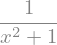

In [2]:
# Exemple
x = Symbol('x')
1/(1+x**2)

In [3]:
pi

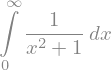

In [4]:
# Expression formelle
mon_integrale = Integral(1/(1+x**2), (x, 0, oo))
mon_integrale

In [5]:
# Calcul de l'intégrale
mon_integrale.doit()

Integral(1/(x**2 + 1), (x, 0, oo))


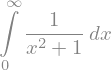

\int\limits_{0}^{\infty} \frac{1}{x^{2} + 1}\, dx


In [6]:
# Représenter une expression
print(mon_integrale) # permet de faire une copier/coller
display(mon_integrale) # Affiche joliment. 
print(latex(mon_integrale)) # Représentation pour latex

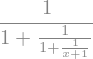

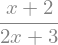

In [8]:
# Simplification
# Fonction ou méthode simplify

expr = 1/(1+1/(1+1/(1+x)))
display(expr)
display(simplify(expr))
#expr.simplify()

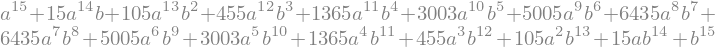

In [9]:
# Expansion
# Fonction ou méthode expand

a = Symbol('a')
b = Symbol('b')

expr = (a+b)**15
expr.expand()

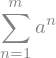

In [10]:
n = Symbol('n', integer=True, positive=True)
m = Symbol('m', integer=True, positive=True)
Sum(a**n, (n, 1, m))

In [12]:
# Remplacer des valeurs
expr = sin(x)
expr
y = Symbol('y')
display(expr.subs(x, acos(y)))

In [13]:
alpha = Symbol('alpha')
display(alpha) # Utilisation des lettres grec

In [15]:
e = Symbol('e')
epsilon_0 = Symbol('epsilon_0') # Indices
hbar = Symbol('hbar')
c = Symbol('c')
m_e = Symbol('m_e')
epsilon_0
hbar

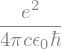

In [16]:
fine_structure = e**2/(4*pi*epsilon_0*hbar*c)
display(fine_structure)

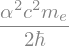

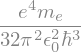

In [17]:
rydberg = m_e *c**2*alpha**2/2/hbar
display(rydberg)
rydberg = simplify(rydberg.subs(alpha, fine_structure) )
display(rydberg)

In [21]:
numerical_values = {
    e : 1.60217662E-19,
    epsilon_0 : 8.8541878128E-12,
    hbar : 1.0545718E-34,
    c : 299792458,
    m_e : 9.10938356E-31
}


N(1/fine_structure.subs(numerical_values))
N(rydberg.subs(numerical_values))

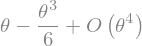

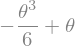

In [22]:
# Devellopement limité
theta = Symbol('theta')
dev_sin = sin(theta).series(theta, 0, n=4)
display(dev_sin)
display(dev_sin.removeO())

In [23]:
# Limite

limit(sin(x)/x, x, 0)

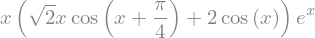

In [24]:
# Dérivées

expr = x**2 * exp(x) * cos(x)
simplify(expr.diff(x))

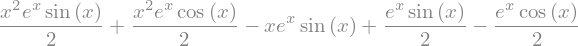

In [25]:
# Intégrales 
integrale_compliquee = integrate(x**2 * exp(x) * cos(x), x)
integrale_compliquee

In [26]:
# Conversion vers numpy
import numpy as np

resultat_numpy = lambdify(x, integrale_compliquee)

resultat_numpy(np.linspace(0, 1))

array([-5.00000000e-01, -4.99997123e-01, -4.99976640e-01, -4.99919992e-01,
       -4.99807585e-01, -4.99618801e-01, -4.99332004e-01, -4.98924561e-01,
       -4.98372855e-01, -4.97652312e-01, -4.96737424e-01, -4.95601786e-01,
       -4.94218127e-01, -4.92558353e-01, -4.90593596e-01, -4.88294260e-01,
       -4.85630082e-01, -4.82570196e-01, -4.79083200e-01, -4.75137231e-01,
       -4.70700049e-01, -4.65739126e-01, -4.60221738e-01, -4.54115076e-01,
       -4.47386351e-01, -4.40002914e-01, -4.31932386e-01, -4.23142791e-01,
       -4.13602700e-01, -4.03281388e-01, -3.92148994e-01, -3.80176692e-01,
       -3.67336879e-01, -3.53603358e-01, -3.38951552e-01, -3.23358708e-01,
       -3.06804126e-01, -2.89269394e-01, -2.70738637e-01, -2.51198771e-01,
       -2.30639781e-01, -2.09054999e-01, -1.86441402e-01, -1.62799924e-01,
       -1.38135772e-01, -1.12458767e-01, -8.57836915e-02, -5.81306515e-02,
       -2.95254543e-02, -1.11022302e-16])

In [27]:
print(integrale_compliquee)

x**2*exp(x)*sin(x)/2 + x**2*exp(x)*cos(x)/2 - x*exp(x)*sin(x) + exp(x)*sin(x)/2 - exp(x)*cos(x)/2


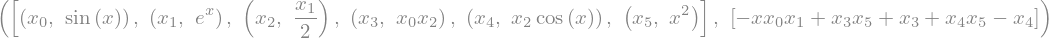

In [28]:
# Possibilité de simplifier le calcul numérique
# Common sub expression
cse(integrale_compliquee)

In [29]:
interm_expr, res = cse(integrale_compliquee)
for inter_var, expr in interm_expr:
    print(f'{inter_var} = {expr}')
print(res[0])

x0 = sin(x)
x1 = exp(x)
x2 = x1/2
x3 = x0*x2
x4 = x2*cos(x)
x5 = x**2
-x*x0*x1 + x3*x5 + x3 + x4*x5 - x4


In [33]:
x = np.linspace(0, 1, 1_000_000)

%timeit resultat_numpy(x)

96.4 ms ± 6.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
def ma_foncion(x):
    x0=np.sin(x)
    x1=np.exp(x)
    x2=x1/2
    x3=x0*x2
    x4=x2*np.cos(x)
    x5=x**2
    return -x*x0*x1 + x3*x5 + x3 + x4*x5 - x4

%timeit ma_foncion(x)

107 ms ± 6.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
import numba

@numba.vectorize
def ma_foncion(x):
    x0=np.sin(x)
    x1=np.exp(x)
    x2=x1/2
    x3=x0*x2
    x4=x2*np.cos(x)
    x5=x**2
    return -x*x0*x1 + x3*x5 + x3 + x4*x5 - x4

ma_foncion(x)
%timeit ma_foncion(x)

15.7 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# Vérifier des calculs manuels

expr1 = (a + I*b)**2
expr2 = a**2 - b**2  + 2*I*a*b
display(expr1)
display(expr2)
assert simplify(expr1-expr2)==0

In [ ]:
# Lettres grec, indices
alpha = Symbol('alpha')
x_0 = Symbol('x_0')
display(alpha, x_0)

In [ ]:
# Constantes
display(pi, I)

In [ ]:
# Attenion ne pas utiliser de float
display(sqrt(pi/2))
display(sqrt((1/2)*pi))

In [ ]:
# Assumption : permet de donner les conditions pour simplifier le calcul
x = Symbol('x')
a = Symbol('a')
integrate(exp(-a*x**2), x)

In [ ]:
a = Symbol('a', positive=True)
integrate(exp(-a*x**2), x)

In [ ]:
# Ne pas oublier ce que l'on sait faire en python (boucle for, fonction!!!)

out = 0
for i, letter in enumerate('abcdefgh'):
    out += Symbol(letter)*x**i
display(out)

In [ ]:

theta = Symbol('theta')
r = Symbol('r', positive=True)
phi = Symbol('phi')

def polar_gradient(u):
    return u.diff(r), u.diff(theta)/r, u.diff(phi)/(r*sin(theta))

def polar_divergence(u_r, u_theta, u_phi):
    return (u_r.diff(r) + 2*u_r/r + 
            u_theta.diff(theta)/r + u_theta*cos(theta)/(r*sin(theta)) + 
            u_phi.diff(phi)/(r*sin(theta)))

def polar_laplacien(u):
    return polar_divergence(*polar_gradient(u))


In [ ]:
polar_laplacien(1/r)

In [ ]:
sigma = Symbol('sigma')
simplify(polar_laplacien(exp(-r**2/(2*sigma**2))))

In [ ]:
F = Function('F')
polar_laplacien(F(r, theta, phi))